# Merge 2016-2018 PGJ and 2019-2023 FGJ Mexico City's crime datasets and plotting season crime information

In [180]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt

#Path
#Insert your local repo path to file 
descargas_path = 'D:/Descargas'
repo_path ='D:\Archivos\Social Data Challenge\sdc-security'
data_path ='D:\Archivos\Social Data Challenge\data'

pd.set_option("display.max_columns", 500)

pgj_raw = pd.read_csv(data_path + '\da_carpetas-de-investigacion-pgj-cdmx.csv')


## Transforming the crime dataset

In [181]:
pgj_raw.rename(columns = lambda x : x.lower() , inplace = True)

pgj_raw.rename(columns ={'ao_hechos':'anio_hecho',
                         'mes_hechos':'mes_hecho',
                         'fechahecho':'fecha_hecho',
                         'horahecho':'hora_hecho',
                         'categoria_delito':'categoria',
                         'alcaldiahechos':'alcaldia',
                         'colonia_datos':'colonia_alt', 
                         'fgj_colonia_registro':'colonia',
                         'longitud':'crimen_lon',
                         'latitud':'crimen_lat',
                         'id_carpeta': 'idcarpeta'}, inplace = True)

other_cols = ['idcarpeta', 'edad','sexo_fem',] 

month_name_to_number = {
    'enero': 1,
    'febrero': 2,
    'marzo': 3,
    'abril': 4,
    'mayo': 5,
    'junio': 6,
    'julio': 7,
    'agosto': 8,
    'septiembre': 9,
    'octubre': 10,
    'noviembre': 11,
    'diciembre': 12
}

pgj_raw["mes_hecho"] = pgj_raw["mes_hecho"].str.lower().map(month_name_to_number) 

for col in other_cols:
    pgj_raw[col]={}

cols_to_use= ['idcarpeta','anio_hecho', 'mes_hecho', 'fecha_hecho', 'hora_hecho',
              'delito', 'categoria', 'edad', 'sexo_fem','colonia_alt', 'colonia', 'alcaldia', 'crimen_lat',
              'crimen_lon',]


other_cols = ['idcarpeta', 'edad','tipopersona', 'calidad_juridica','competencia','sexo_fem',] 


C:\Users\Marco .LAPTOP-8I11FSGG\AppData\Local\Temp\ipykernel_31276\1950755936.py:35: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pgj_raw[col]={}
C:\Users\Marco .LAPTOP-8I11FSGG\AppData\Local\Temp\ipykernel_31276\1950755936.py:35: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pgj_raw[col]={}
C:\Users\Marco .LAPTOP-8I11FSGG\AppData\Local\Temp\ipykernel_31276\1950755936.py:35: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pgj_raw[col]={}


In [182]:
pgj_cuau_trans=(
    pgj_raw[cols_to_use]
        .query("alcaldia == 'CUAUHTEMOC' and delito.str.contains('TRANSEUNTE')")
)

In [183]:
pgj_cuau_trans['anio_hecho'].value_counts()

2018.0    7321
2017.0    5055
2016.0    3153
2019.0    1706
2015.0      59
2014.0       7
2010.0       3
2001.0       2
1992.0       1
2006.0       1
2013.0       1
Name: anio_hecho, dtype: int64

# Season/ temporality columns

## Season columns
For analysis purposes, some new columns related to the season, date, time and time of the day will be added

In [ ]:
season_cols=['quarter', 'id', 'hora_hecho_dt','hour_of_day', 'time_of_day']

In [88]:
crimes_old = crimes.copy()

In [169]:
pgj_cuau_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17312 entries, 244 to 808793
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idcarpeta    0 non-null      float64
 1   anio_hecho   17309 non-null  float64
 2   mes_hecho    17309 non-null  object 
 3   fecha_hecho  17309 non-null  object 
 4   hora_hecho   17309 non-null  object 
 5   delito       17312 non-null  object 
 6   categoria    17312 non-null  object 
 7   edad         0 non-null      float64
 8   sexo_fem     0 non-null      float64
 9   colonia_alt  17127 non-null  object 
 10  colonia      17269 non-null  object 
 11  alcaldia     17312 non-null  object 
 12  crimen_lat   17312 non-null  float64
 13  crimen_lon   17312 non-null  float64
dtypes: float64(6), object(8)
memory usage: 2.0+ MB


In [201]:

pgj_cuau_trans['quarter'] = (pgj_cuau_trans['mes_hecho'] - 1) // 3 + 1
pgj_cuau_trans['id'] = range(1, len(pgj_cuau_trans) + 1)

In [202]:
pgj_cuau_trans['hora_hecho_dt'] = pd.to_datetime(pgj_cuau_trans['hora_hecho'], format='%H:%M:%S', errors='coerce')
pgj_cuau_trans['hour_of_day'] = pgj_cuau_trans['hora_hecho_dt'].dt.hour

# Define bins and labels for time of day
#Divide 24 hours in 4 groups of 6
time_bins = [0, 6, 12, 18, 24]
time_labels = ['NIGHT', 'MORNING', 'AFTERNOON', 'EVENING']
pgj_cuau_trans['time_of_day'] = pd.cut(pgj_cuau_trans['hour_of_day'], 
                                        bins=time_bins, 
                                        labels=time_labels, 
                                        right=False)
pgj_cuau_trans.dropna(subset=['quarter','hora_hecho_dt','hour_of_day','time_of_day'], how = 'all', inplace = True)


In [203]:
pgj_cuau_trans.isnull().sum()

idcarpeta        17309
anio_hecho           0
mes_hecho            0
fecha_hecho          0
hora_hecho           0
delito               0
categoria            0
edad             17309
sexo_fem         17309
colonia_alt        185
colonia             43
alcaldia             0
crimen_lat           0
crimen_lon           0
quarter              0
id                   0
hora_hecho_dt        0
hour_of_day          0
time_of_day          0
dtype: int64

In [204]:
pgj_cuau_trans.columns

Index(['idcarpeta', 'anio_hecho', 'mes_hecho', 'fecha_hecho', 'hora_hecho',
       'delito', 'categoria', 'edad', 'sexo_fem', 'colonia_alt', 'colonia',
       'alcaldia', 'crimen_lat', 'crimen_lon', 'quarter', 'id',
       'hora_hecho_dt', 'hour_of_day', 'time_of_day'],
      dtype='object')

In [196]:
pgj_cuau_trans.query('anio_hecho > 2015')['anio_hecho'].value_counts()

2018.0    7321
2017.0    5055
2016.0    3153
2019.0    1706
Name: anio_hecho, dtype: int64

# Getting the dataset with the most recent years

In [197]:
#Path
#Insert your local repo path to file 
repo_path ='D:\Archivos\Social Data Challenge\data'
pd.set_option("display.max_columns", 500)


In [198]:
cuau_path = "\cuau_robo_transeunte.csv"

cuau_transeunte = pd.read_csv(repo_path+cuau_path)
cuau_transeunte.shape

(8802, 16)

In [206]:
order_cols = ['id', 'idcarpeta', 'delito', 'categoria', 'colonia', 'sexo_fem', 'edad',
       'anio_hecho', 'mes_hecho', 'fecha_hecho', 'hora_hecho', 'quarter',
       'hour_of_day', 'time_of_day', 'crimen_lat', 'crimen_lon']

pgj_cuau_trans = pgj_cuau_trans[order_cols]

In [207]:
print(cuau_transeunte.columns)
print(pgj_cuau_trans.columns)

Index(['id', 'idcarpeta', 'delito', 'categoria', 'colonia', 'sexo_fem', 'edad',
       'anio_hecho', 'mes_hecho', 'fecha_hecho', 'hora_hecho', 'quarter',
       'hour_of_day', 'time_of_day', 'crimen_lat', 'crimen_lon'],
      dtype='object')
Index(['id', 'idcarpeta', 'delito', 'categoria', 'colonia', 'sexo_fem', 'edad',
       'anio_hecho', 'mes_hecho', 'fecha_hecho', 'hora_hecho', 'quarter',
       'hour_of_day', 'time_of_day', 'crimen_lat', 'crimen_lon'],
      dtype='object')


In [208]:
cuau_trans = pd.concat([cuau_transeunte,pgj_cuau_trans], ignore_index=True)

In [211]:
cuau_trans['id'] = range(1, len(cuau_trans) + 1)

In [212]:
cuau_trans['anio_hecho'].value_counts()

2018.0    7413
2017.0    5058
2019.0    4805
2016.0    3156
2022.0    1827
2021.0    1744
2020.0    1637
2023.0     397
2015.0      59
2014.0       7
2010.0       3
2001.0       2
1992.0       1
2006.0       1
2013.0       1
Name: anio_hecho, dtype: int64

In [213]:
cuau_trans.to_csv('../datasets/cuau_trans_all_years.csv', index=False)

In [217]:
cuau= cuau_trans.query('anio_hecho >2015').copy()

[]

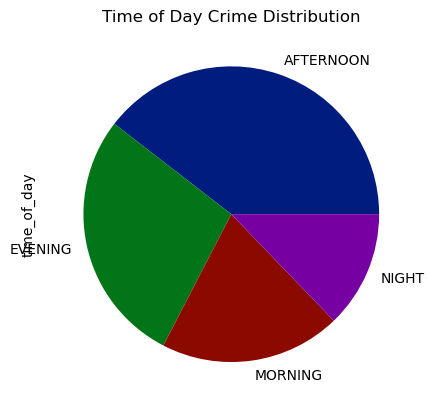

In [229]:
ax = cuau['time_of_day'].value_counts().plot(kind = "pie")
ax.set_title('Time of Day Crime Distribution')  # Adjust title rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Adjust rotation angle


In [227]:
value_counts = cuau[['anio_hecho','quarter']].value_counts().reset_index(name='count')
sorted_counts = value_counts.sort_values(by=['anio_hecho', 'quarter'], ascending=[True, True])
sorted_counts.reset_index(drop=True)

,anio_hecho,quarter,count
0,2016.0,1.0,664
1,2016.0,2.0,797
2,2016.0,3.0,838
3,2016.0,4.0,857
4,2017.0,1.0,913
5,2017.0,2.0,1101
6,2017.0,3.0,1296
7,2017.0,4.0,1748
8,2018.0,1.0,1645
9,2018.0,2.0,1833


In [231]:
counts = cuau.groupby([ 'anio_hecho','quarter']).size().unstack(fill_value=0)
# Plot the bar chart

In [232]:
counts

quarter,1.0,2.0,3.0,4.0
anio_hecho,,,,
2016.0,664,797,838,857
2017.0,913,1101,1296,1748
2018.0,1645,1833,1855,2080
2019.0,2076,1592,609,528
2020.0,511,270,425,431
2021.0,420,412,431,481
2022.0,445,472,367,543
2023.0,397,0,0,0


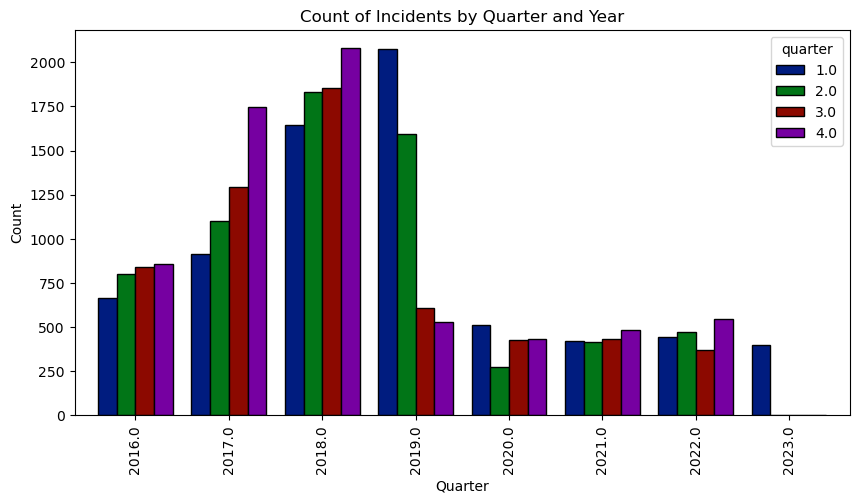

In [246]:
fig, ax = plt.subplots(figsize=(10,5))

counts.plot( 
    kind='bar', 
    stacked=False,
    ax=ax,
    width=0.8,
    edgecolor = 'black'
)

# Add labels and title
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.title('Count of Incidents by Quarter and Year')

# Show the plot
plt.show()




# cuau_agg.sort_values('AFTERNOON').plot(kind='barh',
#                                       stacked =True, 
#                                       ax = ax,
#                                       width = 0.8 ,
#                                       edgecolor = 'black'
#                                      )
# ax.legend(bbox_to_anchor=(1,1))
# ax.set_title('Proporcion Temporal Cuauhtemoc Robo a Transeunte Top 10')
# plt.show()

In [235]:
counts

quarter,1.0,2.0,3.0,4.0
anio_hecho,,,,
2016.0,664,797,838,857
2017.0,913,1101,1296,1748
2018.0,1645,1833,1855,2080
2019.0,2076,1592,609,528
2020.0,511,270,425,431
2021.0,420,412,431,481
2022.0,445,472,367,543
2023.0,397,0,0,0


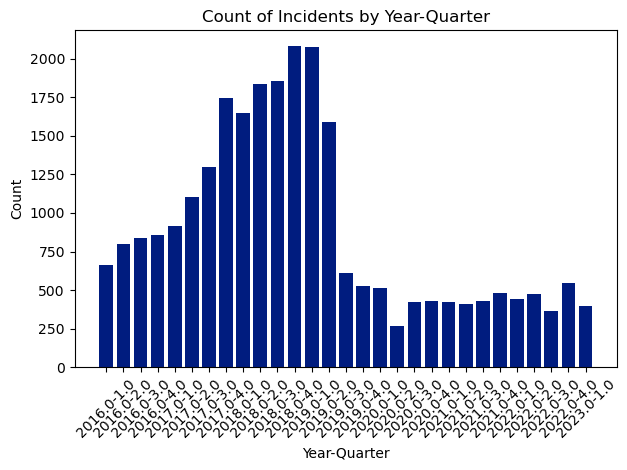

In [244]:
plt.bar(sorted_counts['anio_hecho'].astype(str) + '-' + sorted_counts['quarter'].astype(str), sorted_counts['count'])
# Add labels and title
plt.xlabel('Year-Quarter')
plt.ylabel('Count')
plt.title('Count of Incidents by Year-Quarter')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [242]:
top_colonias = (
    cuau['colonia']
    .value_counts()
    .reset_index()
    #.query("colonia > 250")["index"]
    #.values.tolist()
)

In [33]:
#Change column names
crimes_raw.rename(columns = lambda x : x.lower() , inplace = True)
crimes_raw.rename(columns ={'colonia_catalogo':'colonia_datos'}, inplace = True)

crimes_raw.columns = crimes_raw.columns.str.replace('ñ', 'ni')
crimes_raw.rename(columns = {"latitud":"crimen_lat", "longitud":"crimen_lon"} , inplace = True)

crimes_raw.head()

,id_carpeta,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria,sexo,edad,tipo_persona,calidad_juridica,competencia,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,colonia_datos,colonia_hecho,alcaldia_hecho,municipio_hecho,crimen_lat,crimen_lon
0,8324429,2018.0,Agosto,2018-08-29,12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,Masculino,62.0,FISICA,OFENDIDO,FUERO COMUN,2019,Enero,2019-01-04,12:19:00,GUADALUPE INN,GUADALUPE INN,ALVARO OBREGON,CDMX,19.36125,-99.18314
1,8324430,2018.0,Diciembre,2018-12-15,15:00:00,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,Femenino,38.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019,Enero,2019-01-04,12:20:00,VICTORIA DE LAS DEMOCRACIAS,VICTORIA DE LAS DEMOCRACIAS,AZCAPOTZALCO,CDMX,19.47181,-99.16458
2,8324431,2018.0,Diciembre,2018-12-22,15:30:00,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,Masculino,42.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019,Enero,2019-01-04,12:23:00,COPILCO EL BAJO,COPILCO UNIVERSIDAD ISSSTE,COYOACAN,CDMX,19.33797,-99.18611
3,8324435,2019.0,Enero,2019-01-04,06:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,35.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019,Enero,2019-01-04,12:27:00,PANTITLAN V,AGRÍCOLA PANTITLAN,IZTACALCO,CDMX,19.40327,-99.05983
4,8324438,2019.0,Enero,2019-01-03,20:00:00,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,NaN,FISICA,VICTIMA,FUERO COMUN,2019,Enero,2019-01-04,12:35:00,LAS AMERICAS (U HAB),PROGRESISTA,IZTAPALAPA,CDMX,19.35480,-99.06324


### Handling null values

There are a lot of columns with null values. Since crimes dataset already has more than 1M records, erasing the records that contain null values could help to have a lighter, more accurate dataset

In [34]:
null_counts = crimes_raw.isnull().sum()
print(null_counts)

id_carpeta               0
anio_hecho             386
mes_hecho              386
fecha_hecho            386
hora_hecho            1169
delito                   0
categoria                0
sexo                202672
edad                393028
tipo_persona          6881
calidad_juridica         1
competencia              0
anio_inicio              0
mes_inicio               0
fecha_inicio             0
hora_inicio              2
colonia_datos        79161
colonia_hecho        55549
alcaldia_hecho        1089
municipio_hecho       1089
crimen_lat           55340
crimen_lon           55342
dtype: int64


Almost every value in column *municipio_hechos* is null, so this column will be dropped. After that, every row containing null values will be deleted. An exception is done for column *edad*, so that most of the rows are kept.


In [35]:
del crimes_raw['municipio_hecho']

There are two columns related to *colonias*, and we can check how many cases there are where only one of those columns is populated, so that we fill those empty fields with the other value in the row

In [37]:
crimes_raw.rename(columns ={'colonia_hecho':'fgj_colonia_registro'}, inplace = True)

condition1 = crimes_raw["colonia_datos"].isna() & (
             crimes_raw["fgj_colonia_registro"].notna())

condition2 = crimes_raw["colonia_datos"].notna() & (
             crimes_raw["fgj_colonia_registro"].isna()) 
       
print(crimes_raw.loc[condition1].shape[0])
print(crimes_raw.loc[condition2].shape[0])

crimes_raw.loc[condition1, 'colonia_datos'] = crimes_raw['fgj_colonia_registro']
crimes_raw.loc[condition2, 'fgj_colonia_registro'] = crimes_raw['colonia_datos']

23986
374


The null values in column  'sexo' will be replaced by value 'Masculino'

In [42]:
crimes.isnull().sum()

id_carpeta                   0
anio_hecho                   0
mes_hecho                    0
fecha_hecho                  0
hora_hecho                   0
delito                       0
categoria                    0
sexo                         0
edad                    366693
tipo_persona                 0
calidad_juridica             0
competencia                  0
anio_inicio                  0
mes_inicio                   0
fecha_inicio                 0
hora_inicio                  0
colonia_datos                0
fgj_colonia_registro         0
alcaldia_hecho               0
crimen_lat                   0
crimen_lon                   0
dtype: int64

In [43]:
crimes["id_carpeta"]  = crimes["id_carpeta"].round().astype(int)
crimes["anio_hecho"] = crimes["anio_hecho"].round().astype(int)


Next step is filling the missing *edad* values. First, the median age of each delito will be used. Then, if there were still missing values, the median of the whole dataset will be used. One of the reasons for this to happen are that there are crimes agains organizations or *PERSONA MORAL*, where it is difficult to define the age of the victim. 

In [44]:
median_values = crimes.groupby('delito')['edad'].transform('median')
crimes['edad'] = crimes['edad'].fillna(median_values)


In [45]:
null_counts = crimes.isnull().sum()
print(null_counts)
crimes[crimes['edad'].isna()].head()

id_carpeta               0
anio_hecho               0
mes_hecho                0
fecha_hecho              0
hora_hecho               0
delito                   0
categoria                0
sexo                     0
edad                    60
tipo_persona             0
calidad_juridica         0
competencia              0
anio_inicio              0
mes_inicio               0
fecha_inicio             0
hora_inicio              0
colonia_datos            0
fgj_colonia_registro     0
alcaldia_hecho           0
crimen_lat               0
crimen_lon               0
dtype: int64


,id_carpeta,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria,sexo,edad,tipo_persona,calidad_juridica,competencia,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,colonia_datos,fgj_colonia_registro,alcaldia_hecho,crimen_lat,crimen_lon
63272,8344443,2019,Enero,2019-01-30,07:16:00,"INTIMIDACION (EVITAR DENUNCIA, APORTE INFORMAC...",DELITO DE BAJO IMPACTO,Femenino,NaN,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019,Enero,2019-01-30,10:32:00,ROMERO RUBIO,ROMERO RUBIO,VENUSTIANO CARRANZA,19.44315,-99.09852
73020,8550252,2019,Agosto,2019-08-01,09:00:00,REGULACIÓN URBANA,DELITO DE BAJO IMPACTO,Masculino,NaN,MORAL,VICTIMA,FUERO COMUN,2019,Octubre,2019-10-22,16:00:50,DEL VALLE IV,DEL VALLE CENTRO,BENITO JUAREZ,19.38388,-99.17017
73033,8550314,2019,Julio,2019-07-12,09:00:00,REGULACIÓN URBANA,DELITO DE BAJO IMPACTO,Masculino,NaN,MORAL,VICTIMA,FUERO COMUN,2019,Octubre,2019-10-22,17:02:45,AMERICAS UNIDAS-DEL LAGO,DEL LAGO,BENITO JUAREZ,19.37756,-99.14091
90102,8550007,2019,Octubre,2019-10-22,00:00:00,REGULACIÓN URBANA,DELITO DE BAJO IMPACTO,Masculino,NaN,MORAL,VICTIMA,FUERO COMUN,2019,Octubre,2019-10-22,11:57:33,TIZAPAN_TIZAPAN SAN ANGEL,ERMITA TIZAPAN,ALVARO OBREGON,19.33648,-99.20597
90186,8550288,2019,Agosto,2019-08-09,09:00:00,REGULACIÓN URBANA,DELITO DE BAJO IMPACTO,Masculino,NaN,MORAL,AGRAVIADO,FUERO COMUN,2019,Octubre,2019-10-22,16:42:31,JARDINES DEL PEDREGAL,JARDINES DEL PEDREGAL,ALVARO OBREGON,19.32478,-99.21448


In [46]:
median               = crimes['edad'].median()
crimes["edad"]       = crimes["edad"].fillna(median)
crimes["edad"]       = crimes["edad"].round().astype(int)

In [47]:
null_counts = crimes.isnull().sum()
print(null_counts)

id_carpeta              0
anio_hecho              0
mes_hecho               0
fecha_hecho             0
hora_hecho              0
delito                  0
categoria               0
sexo                    0
edad                    0
tipo_persona            0
calidad_juridica        0
competencia             0
anio_inicio             0
mes_inicio              0
fecha_inicio            0
hora_inicio             0
colonia_datos           0
fgj_colonia_registro    0
alcaldia_hecho          0
crimen_lat              0
crimen_lon              0
dtype: int64


### Converting month names to numeric values

In [48]:
month_name_to_number = {
    'enero': 1,
    'febrero': 2,
    'marzo': 3,
    'abril': 4,
    'mayo': 5,
    'junio': 6,
    'julio': 7,
    'agosto': 8,
    'septiembre': 9,
    'octubre': 10,
    'noviembre': 11,
    'diciembre': 12
}

crimes["mes_inicio"] = crimes["mes_inicio"].str.lower().map(month_name_to_number) 
crimes["mes_hecho"] = crimes["mes_hecho"].str.lower().map(month_name_to_number) 

In [49]:
crimes['sexo_fem'] = np.where(crimes['sexo'].str.upper() == 'FEMENINO', 1, 0)
del crimes["sexo"]
crimes.head()


,id_carpeta,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria,edad,tipo_persona,calidad_juridica,competencia,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,colonia_datos,fgj_colonia_registro,alcaldia_hecho,crimen_lat,crimen_lon,sexo_fem
0,8324429,2018,8,2018-08-29,12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,62,FISICA,OFENDIDO,FUERO COMUN,2019,1,2019-01-04,12:19:00,GUADALUPE INN,GUADALUPE INN,ALVARO OBREGON,19.36125,-99.18314,0
1,8324430,2018,12,2018-12-15,15:00:00,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,38,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019,1,2019-01-04,12:20:00,VICTORIA DE LAS DEMOCRACIAS,VICTORIA DE LAS DEMOCRACIAS,AZCAPOTZALCO,19.47181,-99.16458,1
2,8324431,2018,12,2018-12-22,15:30:00,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,42,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019,1,2019-01-04,12:23:00,COPILCO EL BAJO,COPILCO UNIVERSIDAD ISSSTE,COYOACAN,19.33797,-99.18611,0
3,8324435,2019,1,2019-01-04,06:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,35,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019,1,2019-01-04,12:27:00,PANTITLAN V,AGRÍCOLA PANTITLAN,IZTACALCO,19.40327,-99.05983,0
4,8324438,2019,1,2019-01-03,20:00:00,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,30,FISICA,VICTIMA,FUERO COMUN,2019,1,2019-01-04,12:35:00,LAS AMERICAS (U HAB),PROGRESISTA,IZTAPALAPA,19.35480,-99.06324,0


In [50]:
crimes[crimes["colonia_datos"] != crimes["fgj_colonia_registro"]].shape

(814162, 21)

There are a lot of records where *colonia_datos* and *fgj_colonia_registro* do not match with each other. The reason is that *colonia* names have variations between data sources. Column *fgj_colonia_registro* contains more generic names, so this will be used. The Column *colonia_datos* might help with the homologation process. If it doesnt, it will be just deleted.

In [51]:
crimes.reset_index(drop=True, inplace =True)


In [52]:
crimes.head()

,id_carpeta,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria,edad,tipo_persona,calidad_juridica,competencia,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,colonia_datos,fgj_colonia_registro,alcaldia_hecho,crimen_lat,crimen_lon,sexo_fem
0,8324429,2018,8,2018-08-29,12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,62,FISICA,OFENDIDO,FUERO COMUN,2019,1,2019-01-04,12:19:00,GUADALUPE INN,GUADALUPE INN,ALVARO OBREGON,19.36125,-99.18314,0
1,8324430,2018,12,2018-12-15,15:00:00,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,38,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019,1,2019-01-04,12:20:00,VICTORIA DE LAS DEMOCRACIAS,VICTORIA DE LAS DEMOCRACIAS,AZCAPOTZALCO,19.47181,-99.16458,1
2,8324431,2018,12,2018-12-22,15:30:00,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,42,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019,1,2019-01-04,12:23:00,COPILCO EL BAJO,COPILCO UNIVERSIDAD ISSSTE,COYOACAN,19.33797,-99.18611,0
3,8324435,2019,1,2019-01-04,06:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,35,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019,1,2019-01-04,12:27:00,PANTITLAN V,AGRÍCOLA PANTITLAN,IZTACALCO,19.40327,-99.05983,0
4,8324438,2019,1,2019-01-03,20:00:00,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,30,FISICA,VICTIMA,FUERO COMUN,2019,1,2019-01-04,12:35:00,LAS AMERICAS (U HAB),PROGRESISTA,IZTAPALAPA,19.35480,-99.06324,0


In [81]:
test = (
    crimes
        .query("alcaldia_hecho =='CUAUHTEMOC' and anio_hecho == 2019 and delito.str.contains('TRANSEUNTE') ")['colonia_datos']
        .value_counts()
        .reset_index()
)

In [86]:
test[test['index'].str.contains('DOCTORES')].head(20)

,index,colonia_datos
13,DOCTORES I,61
15,DOCTORES IV,57
17,DOCTORES II,50
18,DOCTORES V,50
36,DOCTORES III,28
65,DOCTORES,1


In [92]:
crimes_old.head()

,id_carpeta,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria,edad,tipo_persona,calidad_juridica,competencia,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,colonia_datos,fgj_colonia_registro,alcaldia_hecho,crimen_lat,crimen_lon,sexo_fem,quarter,id,hora_hecho_dt,hour_of_day,time_of_day
0,8324429,2018,8,2018-08-29,12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,62,FISICA,OFENDIDO,FUERO COMUN,2019,1,2019-01-04,12:19:00,GUADALUPE INN,GUADALUPE INN,ALVARO OBREGON,19.36125,-99.18314,0,3,1,1900-01-01 12:00:00,12,AFTERNOON
1,8324430,2018,12,2018-12-15,15:00:00,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,38,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019,1,2019-01-04,12:20:00,VICTORIA DE LAS DEMOCRACIAS,VICTORIA DE LAS DEMOCRACIAS,AZCAPOTZALCO,19.47181,-99.16458,1,4,2,1900-01-01 15:00:00,15,AFTERNOON
2,8324431,2018,12,2018-12-22,15:30:00,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,42,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019,1,2019-01-04,12:23:00,COPILCO EL BAJO,COPILCO UNIVERSIDAD ISSSTE,COYOACAN,19.33797,-99.18611,0,4,3,1900-01-01 15:30:00,15,AFTERNOON
3,8324435,2019,1,2019-01-04,06:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,35,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019,1,2019-01-04,12:27:00,PANTITLAN V,AGRÍCOLA PANTITLAN,IZTACALCO,19.40327,-99.05983,0,1,4,1900-01-01 06:00:00,6,MORNING
4,8324438,2019,1,2019-01-03,20:00:00,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,30,FISICA,VICTIMA,FUERO COMUN,2019,1,2019-01-04,12:35:00,LAS AMERICAS (U HAB),PROGRESISTA,IZTAPALAPA,19.35480,-99.06324,0,1,5,1900-01-01 20:00:00,20,EVENING


In [111]:
qgis_path = "D:\Archivos\Social Data Challenge\QGIS\crimes-cams.csv"

qgis = pd.read_csv(qgis_path)
qgis.head()

,idcarpeta,delito,categoria,alcaldia,colonia,sexo_fem,edad,anio_hecho,colonia_al,crimen_lat,...,crimes_metro_20m,metro_in_crimes_50m,metro_in_crimes_100m,metro_in_crimes_250m,metro_in_crimes_500m,vial_20,vial_50,vial_100,vial_250,vial_500
0,8324479,ROBO A TRANSEUNTE A BORDO DE TAXI PUBLICO Y PR...,DELITO DE BAJO IMPACTO,CUAUHTEMOC,DOCTORES,0,39,2018,DOCTORES I,19.42244,...,0,0,0,0,2,0,0,0,1,1
1,8324482,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,CUAUHTEMOC,MORELOS,0,40,2018,MORELOS II,19.44962,...,0,0,0,0,0,0,0,0,1,1
2,8324485,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,CUAUHTEMOC,ROMA NORTE,0,37,2018,ROMA NORTE III,19.41359,...,0,0,0,0,1,0,0,0,1,1
3,8324496,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,CUAUHTEMOC,JUAREZ,0,36,2019,JUAREZ,19.42676,...,0,0,0,0,0,0,0,1,1,1
4,8324527,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CUAUHTEMOC,GUERRERO,0,32,2018,GUERRERO III,19.43769,...,0,1,2,2,2,1,1,1,1,1


In [112]:
columns_to_merge = ['id', 'fecha_hecho', 'mes_hecho',
                    'hora_hecho', 'quarter', 'hour_of_day', 
                    'time_of_day']

columns_for_join=['idcarpeta', 'sexo_fem', 'edad']
new_qgis = qgis.merge(cuau_robos_simp[columns_to_merge + columns_for_join],  
                      on= columns_for_join, 
                      how='left')
print(qgis.shape) 
print(new_qgis.shape) 
print(new_qgis.isnull().sum())

(61886, 28)
(64870, 35)
idcarpeta               0
delito                  0
categoria               0
alcaldia                0
colonia                 0
sexo_fem                0
edad                    0
anio_hecho              0
colonia_al              0
crimen_lat              0
crimen_lon              0
hecho_time              0
denuncia_t              0
cams_in_crime_20m       0
cams_in_crime_50m       0
cams_in_crime_100m      0
cams_in_crime_250m      0
cams_in_crime_500m      0
crimes_metro_20m        0
metro_in_crimes_50m     0
metro_in_crimes_100m    0
metro_in_crimes_250m    0
metro_in_crimes_500m    0
vial_20                 0
vial_50                 0
vial_100                0
vial_250                0
vial_500                0
id                      0
fecha_hecho             0
mes_hecho               0
hora_hecho              0
quarter                 0
hour_of_day             0
time_of_day             0
dtype: int64


In [116]:
duplicates = new_qgis[new_qgis.duplicated(keep='first')]
duplicates.shape

(2984, 35)

In [114]:
new_qgis_no_duplicates = new_qgis.drop_duplicates(keep='first')
new_qgis_no_duplicates.shape

(61886, 35)

In [115]:
#new_qgis_no_duplicates[new_qgis_no_duplicates.id.duplicated(keep=False)]
new_qgis_no_duplicates.columns

Index(['idcarpeta', 'delito', 'categoria', 'alcaldia', 'colonia', 'sexo_fem',
       'edad', 'anio_hecho', 'colonia_al', 'crimen_lat', 'crimen_lon',
       'hecho_time', 'denuncia_t', 'cams_in_crime_20m', 'cams_in_crime_50m',
       'cams_in_crime_100m', 'cams_in_crime_250m', 'cams_in_crime_500m',
       'crimes_metro_20m', 'metro_in_crimes_50m', 'metro_in_crimes_100m',
       'metro_in_crimes_250m', 'metro_in_crimes_500m', 'vial_20', 'vial_50',
       'vial_100', 'vial_250', 'vial_500', 'id', 'fecha_hecho', 'mes_hecho',
       'hora_hecho', 'quarter', 'hour_of_day', 'time_of_day'],
      dtype='object')

In [117]:
cuau_robos_complete = new_qgis_no_duplicates.reset_index(drop=True).copy()


In [120]:
cuau_robos_complete.isnull().sum()

idcarpeta               0
delito                  0
categoria               0
alcaldia                0
colonia                 0
sexo_fem                0
edad                    0
anio_hecho              0
colonia_al              0
crimen_lat              0
crimen_lon              0
hecho_time              0
denuncia_t              0
cams_in_crime_20m       0
cams_in_crime_50m       0
cams_in_crime_100m      0
cams_in_crime_250m      0
cams_in_crime_500m      0
crimes_metro_20m        0
metro_in_crimes_50m     0
metro_in_crimes_100m    0
metro_in_crimes_250m    0
metro_in_crimes_500m    0
vial_20                 0
vial_50                 0
vial_100                0
vial_250                0
vial_500                0
id                      0
fecha_hecho             0
mes_hecho               0
hora_hecho              0
quarter                 0
hour_of_day             0
time_of_day             0
dtype: int64

In [133]:
#Discarding alcaldia, colonia_alt and hecho_time
new_col_order =['id', 'idcarpeta', 'delito', 'categoria', 'colonia','sexo_fem', 
                     'edad', 'anio_hecho', 'fecha_hecho', 'mes_hecho', 'hora_hecho', 
                     'quarter', 'hour_of_day', 'time_of_day','crimen_lat', 'crimen_lon','denuncia_t', 
                     'cams_in_crime_20m', 'cams_in_crime_50m', 'cams_in_crime_100m', 'cams_in_crime_250m', 'cams_in_crime_500m',
                     'crimes_metro_20m', 'metro_in_crimes_50m', 'metro_in_crimes_100m','metro_in_crimes_250m', 'metro_in_crimes_500m', 
                     'vial_20', 'vial_50','vial_100', 'vial_250', 'vial_500']

cuau_robos_complete = cuau_robos_complete[new_col_order].copy()


In [135]:
cuau_robos_complete.to_csv('../datasets/cuau_robos_complete.csv', index=False)
